In [1]:
import pandas as pd
from sklearn import preprocessing
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Reading data into dataframe
Here the location of the files need to change. You need to set up the folder that contains the mapping files.
Mapping files are shared with this notebook file.

In [2]:
mypath = "/Users/ab42/Desktop/PILOT/MAPPING/"

myfile = mypath + "WALK_280/d14-R1_S2_walk280.mapping.out"
PILOT_500X_D14_R1 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_280/d14-R2_S3_walk280.mapping.out"
PILOT_500X_D14_R2 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_280/d14-R3_S4_walk280.mapping.out"
PILOT_500X_D14_R3 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_280/d3_S1_walk280.mapping.out"
PILOT_500X_D3 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_280/lib_S5_walk280.mapping.out"
PILOT_Plasmid = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)

myfile = mypath + "WALK_285/d14-1-100x_S2_walk285.mapping.out"
PILOT_100X_D14_R1 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_285/d14-2-100x_S3_walk285.mapping.out"
PILOT_100X_D14_R2 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_285/d14-3-100x_S4_walk285.mapping.out"
PILOT_100X_D14_R3 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_285/d3-100x_S1_walk285.mapping.out"
PILOT_100X_D3 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)

myfile = mypath + "WALK_285/d14-1-500x_S6_walk285.mapping.out"
PILOT_PCR500X_D14_R1 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_285/d14-2-500x_S7_walk285.mapping.out"
PILOT_PCR500X_D14_R2 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_285/d14-3-500x_S8_walk285.mapping.out"
PILOT_PCR500X_D14_R3 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)
myfile = mypath + "WALK_285/d3-500x_S5_walk285.mapping.out"
PILOT_PCR500X_D3 = pd.read_csv(myfile,sep="\t",skiprows=3,header=None)

In [3]:
PILOT_500X_D14_R1_Summary = PILOT_500X_D14_R1[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]
PILOT_500X_D14_R2_Summary = PILOT_500X_D14_R2[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]
PILOT_500X_D14_R3_Summary = PILOT_500X_D14_R3[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]
PILOT_500X_D3_Summary = PILOT_500X_D3[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]
PILOT_Plasmid_Summary = PILOT_Plasmid[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]

PILOT_100X_D14_R1_Summary = PILOT_100X_D14_R1[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]  
PILOT_100X_D14_R2_Summary = PILOT_100X_D14_R2[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]
PILOT_100X_D14_R3_Summary = PILOT_100X_D14_R3[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]
PILOT_100X_D3_Summary = PILOT_100X_D3[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]

PILOT_PCR500X_D14_R1_Summary = PILOT_PCR500X_D14_R1[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]] 
PILOT_PCR500X_D14_R2_Summary = PILOT_PCR500X_D14_R2[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]] 
PILOT_PCR500X_D14_R3_Summary = PILOT_PCR500X_D14_R3[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]]
PILOT_PCR500X_D3_Summary = PILOT_PCR500X_D3[[0,10,11,12,13,14,16,17,19,20,22,23,25,26,29,30,31,32,33]] 

PILOT_500X_D14_R1_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_500X_D14_R2_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_500X_D14_R3_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_500X_D3_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_Plasmid_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_100X_D14_R1_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_100X_D14_R2_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_100X_D14_R3_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_100X_D3_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_PCR500X_D14_R1_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_PCR500X_D14_R2_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_PCR500X_D14_R3_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']
PILOT_PCR500X_D3_Summary.columns = ['Readname','VectorID1','V1edit1R1','V1direction1R1','V1edit2R1','V1direction2R1','Scaffold','Scaffold_edit','Linker','Linker_edit','tRNA','tRNA_edit','Improved','Improved_edit','VectorID2','V2edit1R1','V2direction1R1','V2edit2R2','V2direction2R2']

In [4]:
mysamples = [['PILOT_Plasmid',PILOT_Plasmid_Summary],
             ['PILOT_500X_D14_R1',PILOT_500X_D14_R1_Summary],
             ['PILOT_500X_D14_R2',PILOT_500X_D14_R2_Summary],
             ['PILOT_500X_D14_R3',PILOT_500X_D14_R3_Summary],
             ['PILOT_500X_D3',PILOT_500X_D3_Summary],
             ['PILOT_100X_D14_R1',PILOT_100X_D14_R1_Summary],
             ['PILOT_100X_D14_R2',PILOT_100X_D14_R2_Summary],
             ['PILOT_100X_D14_R3',PILOT_100X_D14_R3_Summary],
             ['PILOT_100X_D3',PILOT_100X_D3_Summary],
             ['PILOT_PCR500X_D14_R1',PILOT_PCR500X_D14_R1_Summary],
             ['PILOT_PCR500X_D14_R2',PILOT_PCR500X_D14_R2_Summary],
             ['PILOT_PCR500X_D14_R3',PILOT_PCR500X_D14_R3_Summary],
             ['PILOT_PCR500X_D3',PILOT_PCR500X_D3_Summary]]

In [6]:
def getstats(testdata,samplename,results):
    total_number_of_reads = testdata['Readname'].count()
    results.append([samplename,"total_reads",total_number_of_reads])
    
    a = testdata[((testdata['VectorID1']!="OEM2")&(testdata['VectorID1']!="OEM2_WO")&(testdata['VectorID1']!="NOMATCH"))|
                 ((testdata['VectorID2']!="OEM2")&(testdata['VectorID2']!="OEM2_WO")&(testdata['VectorID2']!="NOMATCH"))]
    b = a[(a['V1edit1R1']==0) & (a['V2edit1R1']==0) & (a['V1direction1R1']=="F") & (a['V2direction1R1']=="F") ]['Readname'].count()
    sgRNA1_exists=(b/total_number_of_reads)*100
    results.append([samplename,"sgrna1_exists",sgRNA1_exists])
    
    a = testdata[((testdata['VectorID1']!="OEM1")&(testdata['VectorID1']!="OEM1_WO")&(testdata['VectorID1']!="NOMATCH"))|
                 ((testdata['VectorID2']!="OEM1")&(testdata['VectorID2']!="OEM1_WO")&(testdata['VectorID2']!="NOMATCH"))]
    b = a[(a['V1edit2R1']==0) & (a['V2edit2R2']==0) & (a['V1direction2R1']=="F") & (a['V2direction2R2']=="R")]['Readname'].count()
    sgRNA2_exists=(b/total_number_of_reads)*100
    results.append([samplename,"sgrna2_exists",sgRNA2_exists])
    
    a = testdata[((testdata['VectorID1']!="OEM2")&(testdata['VectorID1']!="OEM2_WO")&(testdata['VectorID1']!="NOMATCH"))|
                 ((testdata['VectorID2']!="OEM2")&(testdata['VectorID2']!="OEM2_WO")&(testdata['VectorID2']!="NOMATCH"))]
    b = a[(a['V1edit1R1']<=1) & (a['V2edit1R1']<=1) & (a['V1direction1R1']=="F") & (a['V2direction1R1']=="F") ]['Readname'].count()
    sgRNA1_exists_mismatch1=(b/total_number_of_reads)*100
    results.append([samplename,"sgrna1_exists_mismatch1",sgRNA1_exists_mismatch1])
    
    a = testdata[((testdata['VectorID1']!="OEM1")&(testdata['VectorID1']!="OEM1_WO")&(testdata['VectorID1']!="NOMATCH"))|
                 ((testdata['VectorID2']!="OEM1")&(testdata['VectorID2']!="OEM1_WO")&(testdata['VectorID2']!="NOMATCH"))]
    b = a[(a['V1edit2R1']<=1) & (a['V2edit2R2']<=1) & (a['V1direction2R1']=="F") & (a['V2direction2R2']=="R")]['Readname'].count()
    sgRNA2_exists_mismatch1=(b/total_number_of_reads)*100
    results.append([samplename,"sgrna2_exists_mismatch1",sgRNA2_exists_mismatch1])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1'].str.contains('OEM1')) &
                 (testdata['V1edit1R1']==0) & (testdata['V1direction1R1']=="F") &
                 (testdata['V2edit1R1']==0) & (testdata['V2direction1R1']=="F")]['Readname'].count()
    OEM1_exact = (a/total_number_of_reads)*100
    results.append([samplename,"OEM1_exact",OEM1_exact])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1'].str.contains('OEM1')) &
                 (testdata['V1edit1R1']<=1) & (testdata['V1direction1R1']=="F") &
                 (testdata['V2edit1R1']<=1) & (testdata['V2direction1R1']=="F")]['Readname'].count()
    OEM1_mismatch = (a/total_number_of_reads)*100
    results.append([samplename,"OEM1_mismatch",OEM1_mismatch])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1'].str.contains('OEM2')) &
                 (testdata['V1edit2R1']==0) & (testdata['V2edit2R2']==0)]['Readname'].count()
    OEM2_exact = (a/total_number_of_reads)*100
    results.append([samplename,"OEM2_exact",OEM2_exact])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1'].str.contains('OEM2')) &
                 (testdata['V1edit2R1']==0) & (testdata['V2edit2R2']==0)]['Readname'].count()
    OEM2_mismatch = (a/total_number_of_reads)*100
    results.append([samplename,"OEM2_mismatch",OEM2_mismatch])    
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['V1edit2R1']==0) & (testdata['V2edit1R1']==0) &
                 (testdata['V1direction1R1']=="F") & (testdata['V1direction2R1']=="F") &
                 (testdata['V2edit1R1']==0) & (testdata['V2edit2R2']==0) &
                 (testdata['V2direction1R1']=="F") & (testdata['V2direction2R2']=="R")]['Readname'].count()
    sgRNA_match = (a/total_number_of_reads)*100
    results.append([samplename,"sgrna_match",sgRNA_match])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['V1edit2R1']<=1) & (testdata['V2edit1R1']<=1) &
                 (testdata['V1direction1R1']=="F") & (testdata['V1direction2R1']=="F") &
                 (testdata['V2edit1R1']<=1) & (testdata['V2edit2R2']<=1) &
                 (testdata['V2direction1R1']=="F") & (testdata['V2direction2R2']=="R")]['Readname'].count()
    sgRNA_match_mismatch1 = (a/total_number_of_reads)*100
    results.append([samplename,"sgrna_match_mismatch1",sgRNA_match_mismatch1])
    
    a = testdata[(testdata['VectorID1']!=testdata['VectorID2'])]['Readname'].count()
    sgRNA_inconsistent = (a/total_number_of_reads)*100
    results.append([samplename,"sgrna_inconsistent",sgRNA_inconsistent])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") & (testdata['V1edit2R1']==0) & (testdata['V2edit1R1']==0) &
                 (testdata['V2edit1R1']==0) & (testdata['V2edit2R2']==0)]['Readname'].count()
    swap = (a/total_number_of_reads)*100
    results.append([samplename,"swap",swap])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") & (testdata['V1edit2R1']<=1) & (testdata['V2edit1R1']<=1) &
                 (testdata['V2edit1R1']<=1) & (testdata['V2edit2R2']<=1)]['Readname'].count()
    swap_mismatch1 = (a/total_number_of_reads)*100
    results.append([samplename,"swap_mismatch1",swap_mismatch1])

    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Modified6") | (testdata['Scaffold']=="Modified7") | (testdata['Scaffold']=="Wildtype")) & 
                 (testdata['Scaffold_edit']==0)]['Readname'].count()
    scaffold_exist = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_exist",scaffold_exist])

    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Modified6") | (testdata['Scaffold']=="Modified7") | (testdata['Scaffold']=="Wildtype")) & 
                 (testdata['Scaffold_edit']<=3)]['Readname'].count()
    scaffold_exist_mismatch1 = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_exist_mismatch1",scaffold_exist_mismatch1])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Wildtype")) & 
                 (testdata['Scaffold_edit']==0)]['Readname'].count()
    scaffold_WT = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_WT",scaffold_WT])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Modified6")) & 
                 (testdata['Scaffold_edit']==0)]['Readname'].count()
    scaffold_MT6 = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_MT6",scaffold_MT6])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Modified7")) & 
                 (testdata['Scaffold_edit']==0)]['Readname'].count()
    scaffold_MT7 = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_MT7",scaffold_MT7])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Wildtype")) & 
                 (testdata['Scaffold_edit']<=3)]['Readname'].count()
    scaffold_WT_mismatch3 = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_WT_mismatch3",scaffold_WT_mismatch3])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Modified6")) & 
                 (testdata['Scaffold_edit']<=3)]['Readname'].count()
    scaffold_MT6_mismatch3 = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_MT6_mismatch3",scaffold_MT6_mismatch3])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & 
                 ((testdata['Scaffold']=="Modified7")) & 
                 (testdata['Scaffold_edit']<=3)]['Readname'].count()
    scaffold_MT7_mismatch3 = (a/total_number_of_reads)*100
    results.append([samplename,"scaffold_MT7_mismatch3",scaffold_MT7_mismatch3])
        
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") &
                 (testdata['V1edit2R1']==0) & (testdata['V2edit1R1']==0) &
                 (testdata['V2edit1R1']==0) & (testdata['V2edit2R2']==0) &
                 ((testdata['Scaffold']=="Wildtype")) & 
                 (testdata['Scaffold_edit']==0)]['Readname'].count()
    swap_WT = (a/total_number_of_reads)*100
    results.append([samplename,"swap_WT",swap_WT])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") &
                 (testdata['V1edit2R1']==0) & (testdata['V2edit1R1']==0) &
                 (testdata['V2edit1R1']==0) & (testdata['V2edit2R2']==0) &
                 ((testdata['Scaffold']=="Modified6")) & 
                 (testdata['Scaffold_edit']==0)]['Readname'].count()
    swap_MT6 = (a/total_number_of_reads)*100
    results.append([samplename,"swap_MT6",swap_MT6])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") &
                 (testdata['V1edit2R1']==0) & (testdata['V2edit1R1']==0) &
                 (testdata['V2edit1R1']==0) & (testdata['V2edit2R2']==0) &
                 ((testdata['Scaffold']=="Modified7")) & 
                 (testdata['Scaffold_edit']==0)]['Readname'].count()
    swap_MT7 = (a/total_number_of_reads)*100
    results.append([samplename,"swap_MT7",swap_MT7])

    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") &
                 (testdata['V1edit2R1']<=1) & (testdata['V2edit1R1']<=1) &
                 (testdata['V2edit1R1']<=1) & (testdata['V2edit2R2']<=1) &
                 ((testdata['Scaffold']=="Wildtype")) & 
                 (testdata['Scaffold_edit']<=3)]['Readname'].count()
    swap_WT_mismatch = (a/total_number_of_reads)*100
    results.append([samplename,"swap_WT_mismatch",swap_WT_mismatch])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") &
                 (testdata['V1edit2R1']<=1) & (testdata['V2edit1R1']<=1) &
                 (testdata['V2edit1R1']<=1) & (testdata['V2edit2R2']<=1) &
                 ((testdata['Scaffold']=="Modified6")) & 
                 (testdata['Scaffold_edit']<=3)]['Readname'].count()
    swap_MT6_mismatch = (a/total_number_of_reads)*100
    results.append([samplename,"swap_MT6_mismatch",swap_MT6_mismatch])
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['VectorID1']=="SWAP") &
                 (testdata['V1edit2R1']<=1) & (testdata['V2edit1R1']<=1) &
                 (testdata['V2edit1R1']<=1) & (testdata['V2edit2R2']<=1) &
                 ((testdata['Scaffold']=="Modified7")) & 
                 (testdata['Scaffold_edit']<=3)]['Readname'].count()
    swap_MT7_mismatch = (a/total_number_of_reads)*100
    results.append([samplename,"swap_MT7_mismatch",swap_MT7_mismatch])

In [7]:
results=[]
for i,j in mysamples:
    getstats(j,i,results)
df = pd.DataFrame(results,columns=['Sample','type','value'])

# The code for generating the counts that is used for logFC later
Here inside the getcount function you need to change the output folder

In [ ]:
def getcounts(testdata,samplename):
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['V1edit2R1']==0) & (testdata['V2edit1R1']==0) &
                 (testdata['V1direction1R1']=="F") & (testdata['V1direction2R1']=="F") &
                 (testdata['V2edit1R1']==0) & (testdata['V2edit2R2']==0) &
                 (testdata['V2direction1R1']=="F") & (testdata['V2direction2R2']=="R")]['VectorID1']
    b = a.value_counts()
    c = b.to_frame()
    outfilename = "/Users/ab42/Desktop/PILOT/COUNTS/"+samplename+"_exact.txt"
    c.to_csv(outfilename,sep="\t")
    
    a = testdata[(testdata['VectorID1']==testdata['VectorID2']) & (testdata['V1edit2R1']<=1) & (testdata['V2edit1R1']<=1) &
                 (testdata['V1direction1R1']=="F") & (testdata['V1direction2R1']=="F") &
                 (testdata['V2edit1R1']<=1) & (testdata['V2edit2R2']<=1) &
                 (testdata['V2direction1R1']=="F") & (testdata['V2direction2R2']=="R")]['VectorID1']
    b = a.value_counts()
    c = b.to_frame()
    outfilename = "//Users/ab42/Desktop/PILOT/COUNTS/"+samplename+"_mismatch.txt"
    c.to_csv(outfilename,sep="\t")

In [ ]:
for i,j in mysamples:
    getcounts(j,i)

# Plotting the overall stats
Change the output location of the plots inside the plot_stats function.

In [8]:
def plot_stats(mytype,mytitle,mylabel,plotname):
    %matplotlib inline
    data1 = df[df['type']==mytype]
    pal1 = sns.color_palette("Greys_d",1)
    pal2 = sns.color_palette("Oranges_d",4)
    pal3 = sns.color_palette("Greens_d", 4)
    pal4 = sns.color_palette("Blues_d", 4)
    pal = pal1 + pal2 + pal3 + pal4
    ax = sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal)
    ax.set(xlabel='Sample', ylabel=mylabel)
    ax.set_title(mytitle)
    plt.xticks(rotation=90)
    plotoutfilename = "/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/" + plotname
    plt.savefig(plotoutfilename,dpi=300, bbox_inches="tight")

/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/255406257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal)


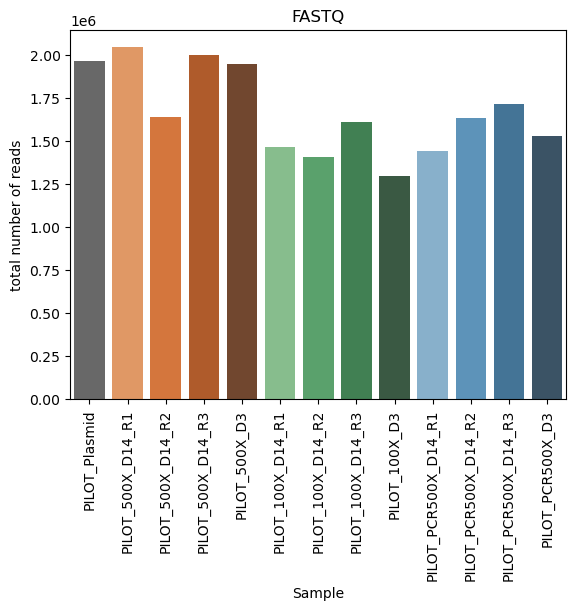

In [9]:
plot_stats("total_reads","FASTQ","total number of reads","totalreads.jpg")

/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/255406257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal)


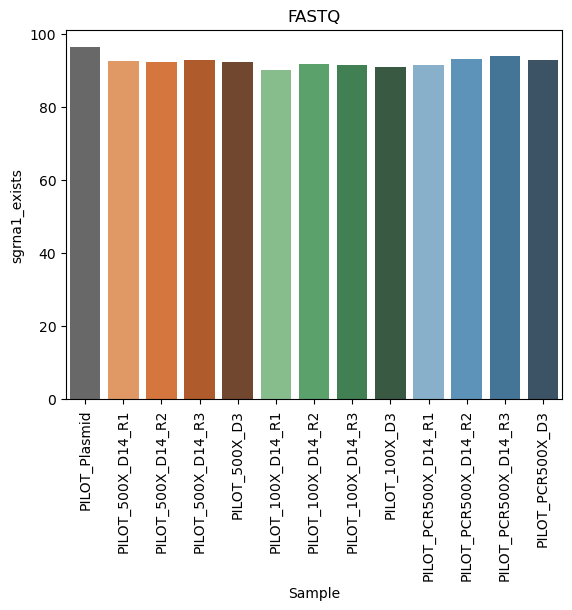

In [10]:
plot_stats("sgrna1_exists","FASTQ","sgrna1_exists","sgrna1_exists.jpg")

/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/255406257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal)
/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/255406257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal)
/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/255406257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal)
/

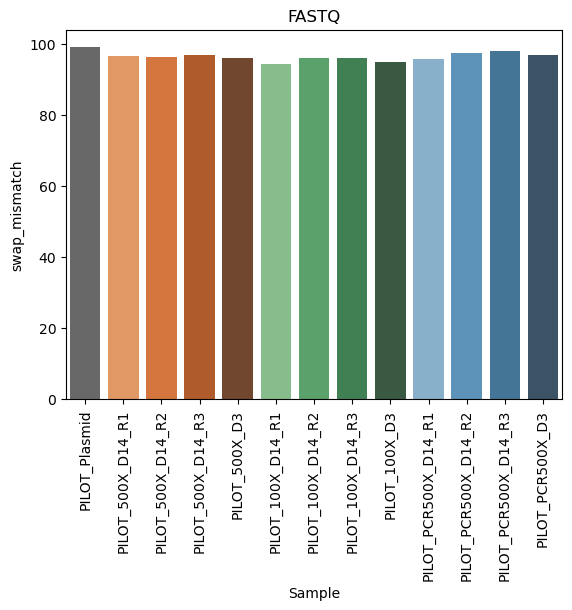

In [11]:
plot_stats("sgrna1_exists_mismatch1","FASTQ","sgrna1_exists_mismatch","sgrna1_exists_mismatch.jpg")
plot_stats("sgrna2_exists","FASTQ","sgrna2_exists","sgrna2_exists.jpg")
plot_stats("sgrna2_exists_mismatch1","FASTQ","sgrna2_exists_mismatch1","sgrna2_exists_mismatch1.jpg")
plot_stats("sgrna_inconsistent","FASTQ","sgrna_inconsistent","sgrna_inconsistent.jpg")
plot_stats("sgrna_match","FASTQ","sgrna_match","sgrna_match.jpg")
plot_stats("sgrna_match_mismatch1","FASTQ","sgrna_match_mismatch","sgrna_match_mismatch.jpg")
plot_stats("swap","FASTQ","swap","swap.jpg")
plot_stats("swap_mismatch1","FASTQ","swap_mismatch","swap_mismatch.jpg")

/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/896956493.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal, ax=axs[0])
/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/896956493.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[1])
/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/896956493.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data1['Sample'], y=data1['value'], palet

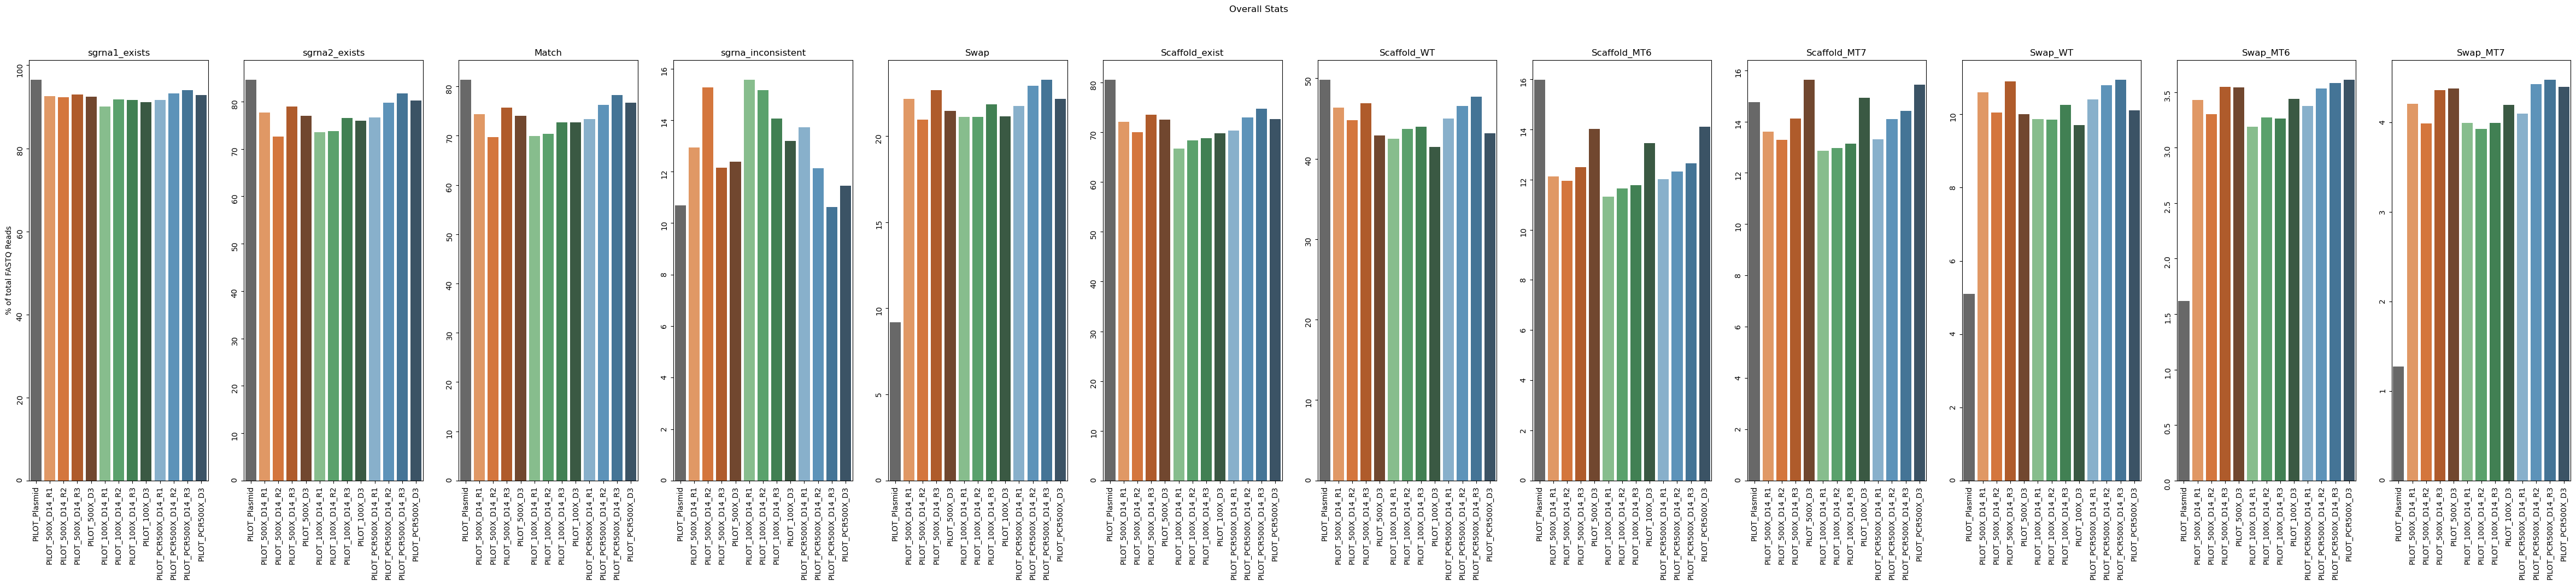

In [15]:
%matplotlib inline
fig, axs = plt.subplots(1, 12,figsize=(60,10))
fig.suptitle('Overall Stats')
pal1 = sns.color_palette("Greys_d",1)
pal2 = sns.color_palette("Oranges_d",4)
pal3 = sns.color_palette("Greens_d", 4)
pal4 = sns.color_palette("Blues_d", 4)
pal = pal1 + pal2 + pal3 + pal4

data1 = df[df['type']=="sgrna1_exists"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal, ax=axs[0])
axs[0].set_title("sgrna1_exists")
axs[0].tick_params(labelrotation=90)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% of total FASTQ Reads")

data1 = df[df['type']=="sgrna2_exists"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[1])
axs[1].set_title("sgrna2_exists")
axs[1].tick_params(labelrotation=90)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

data1 = df[df['type']=="sgrna_match"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[2])
axs[2].set_title("Match")
axs[2].tick_params(labelrotation=90)
axs[2].set_xlabel(None)
axs[2].set_ylabel(None)

data1 = df[df['type']=="sgrna_inconsistent"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[3])
axs[3].set_title("sgrna_inconsistent")
axs[3].tick_params(labelrotation=90)
axs[3].set_xlabel(None)
axs[3].set_ylabel(None)

data1 = df[df['type']=="swap"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[4])
axs[4].set_title("Swap")
axs[4].tick_params(labelrotation=90)
axs[4].set_xlabel(None)
axs[4].set_ylabel(None)

data1 = df[df['type']=="scaffold_exist"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[5])
axs[5].set_title("Scaffold_exist")
axs[5].tick_params(labelrotation=90)
axs[5].set_xlabel(None)
axs[5].set_ylabel(None)

data1 = df[df['type']=="scaffold_WT"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[6])
axs[6].set_title("Scaffold_WT")
axs[6].tick_params(labelrotation=90)
axs[6].set_xlabel(None)
axs[6].set_ylabel(None)

data1 = df[df['type']=="scaffold_MT6"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[7])
axs[7].set_title("Scaffold_MT6")
axs[7].tick_params(labelrotation=90)
axs[7].set_xlabel(None)
axs[7].set_ylabel(None)

data1 = df[df['type']=="scaffold_MT7"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[8])
axs[8].set_title("Scaffold_MT7")
axs[8].tick_params(labelrotation=90)
axs[8].set_xlabel(None)
axs[8].set_ylabel(None)

data1 = df[df['type']=="swap_WT"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[9])
axs[9].set_title("Swap_WT")
axs[9].tick_params(labelrotation=90)
axs[9].set_xlabel(None)
axs[9].set_ylabel(None)

data1 = df[df['type']=="swap_MT6"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[10])
axs[10].set_title("Swap_MT6")
axs[10].tick_params(labelrotation=90)
axs[10].set_xlabel(None)
axs[10].set_ylabel(None)

data1 = df[df['type']=="swap_MT7"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[11])
axs[11].set_title("Swap_MT7")
axs[11].tick_params(labelrotation=90)
axs[11].set_xlabel(None)
axs[11].set_ylabel(None)

fig.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/overall_exact.jpg",dpi=300, bbox_inches="tight")


In [54]:
df99 = df
filtered_df99 = df99[df99['type'].str.contains('mismatch')==False]
filtered_df99 = filtered_df99[filtered_df99['type'].str.contains('total_reads')==False]
filtered_df99 = filtered_df99[filtered_df99['type'].str.contains('OEM')==False]
filtered_df99 = filtered_df99[filtered_df99['type'].str.contains('inconsistent')==False]
filtered_df99 = filtered_df99[filtered_df99['type'].str.contains('WT')==False]
filtered_df99 = filtered_df99[filtered_df99['type'].str.contains('MT6')==False]
filtered_df99 = filtered_df99[filtered_df99['type'].str.contains('MT7')==False]
filtered_df99 = filtered_df99[filtered_df99['type'].str.contains('scaffold')==False]
filtered_df99

,Sample,type,value
1,PILOT_Plasmid,sgrna1_exists,96.451148
2,PILOT_Plasmid,sgrna2_exists,84.564718
9,PILOT_Plasmid,sgrna_match,81.310491
12,PILOT_Plasmid,swap,9.195634
29,PILOT_500X_D14_R1,sgrna1_exists,92.627623
30,PILOT_500X_D14_R1,sgrna2_exists,77.669216
37,PILOT_500X_D14_R1,sgrna_match,74.371290
40,PILOT_500X_D14_R1,swap,22.162711
57,PILOT_500X_D14_R2,sgrna1_exists,92.318862
58,PILOT_500X_D14_R2,sgrna2_exists,72.648227


/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/2873006247.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data1['type'], y=data1['value'], palette=pal, ax=axs[0])
/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/2873006247.py:11: UserWarning: The palette list has more values (16) than needed (4), which may not be intended.
  sns.barplot(x=data1['type'], y=data1['value'], palette=pal, ax=axs[0])
/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/2873006247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data1['type'], y=data1['value'], palette=pal, ax=axs[1])
/var/folders/00/r6jsqs9s0kg655bv35gt0dh80000gp/T/ipykernel_35669/287300

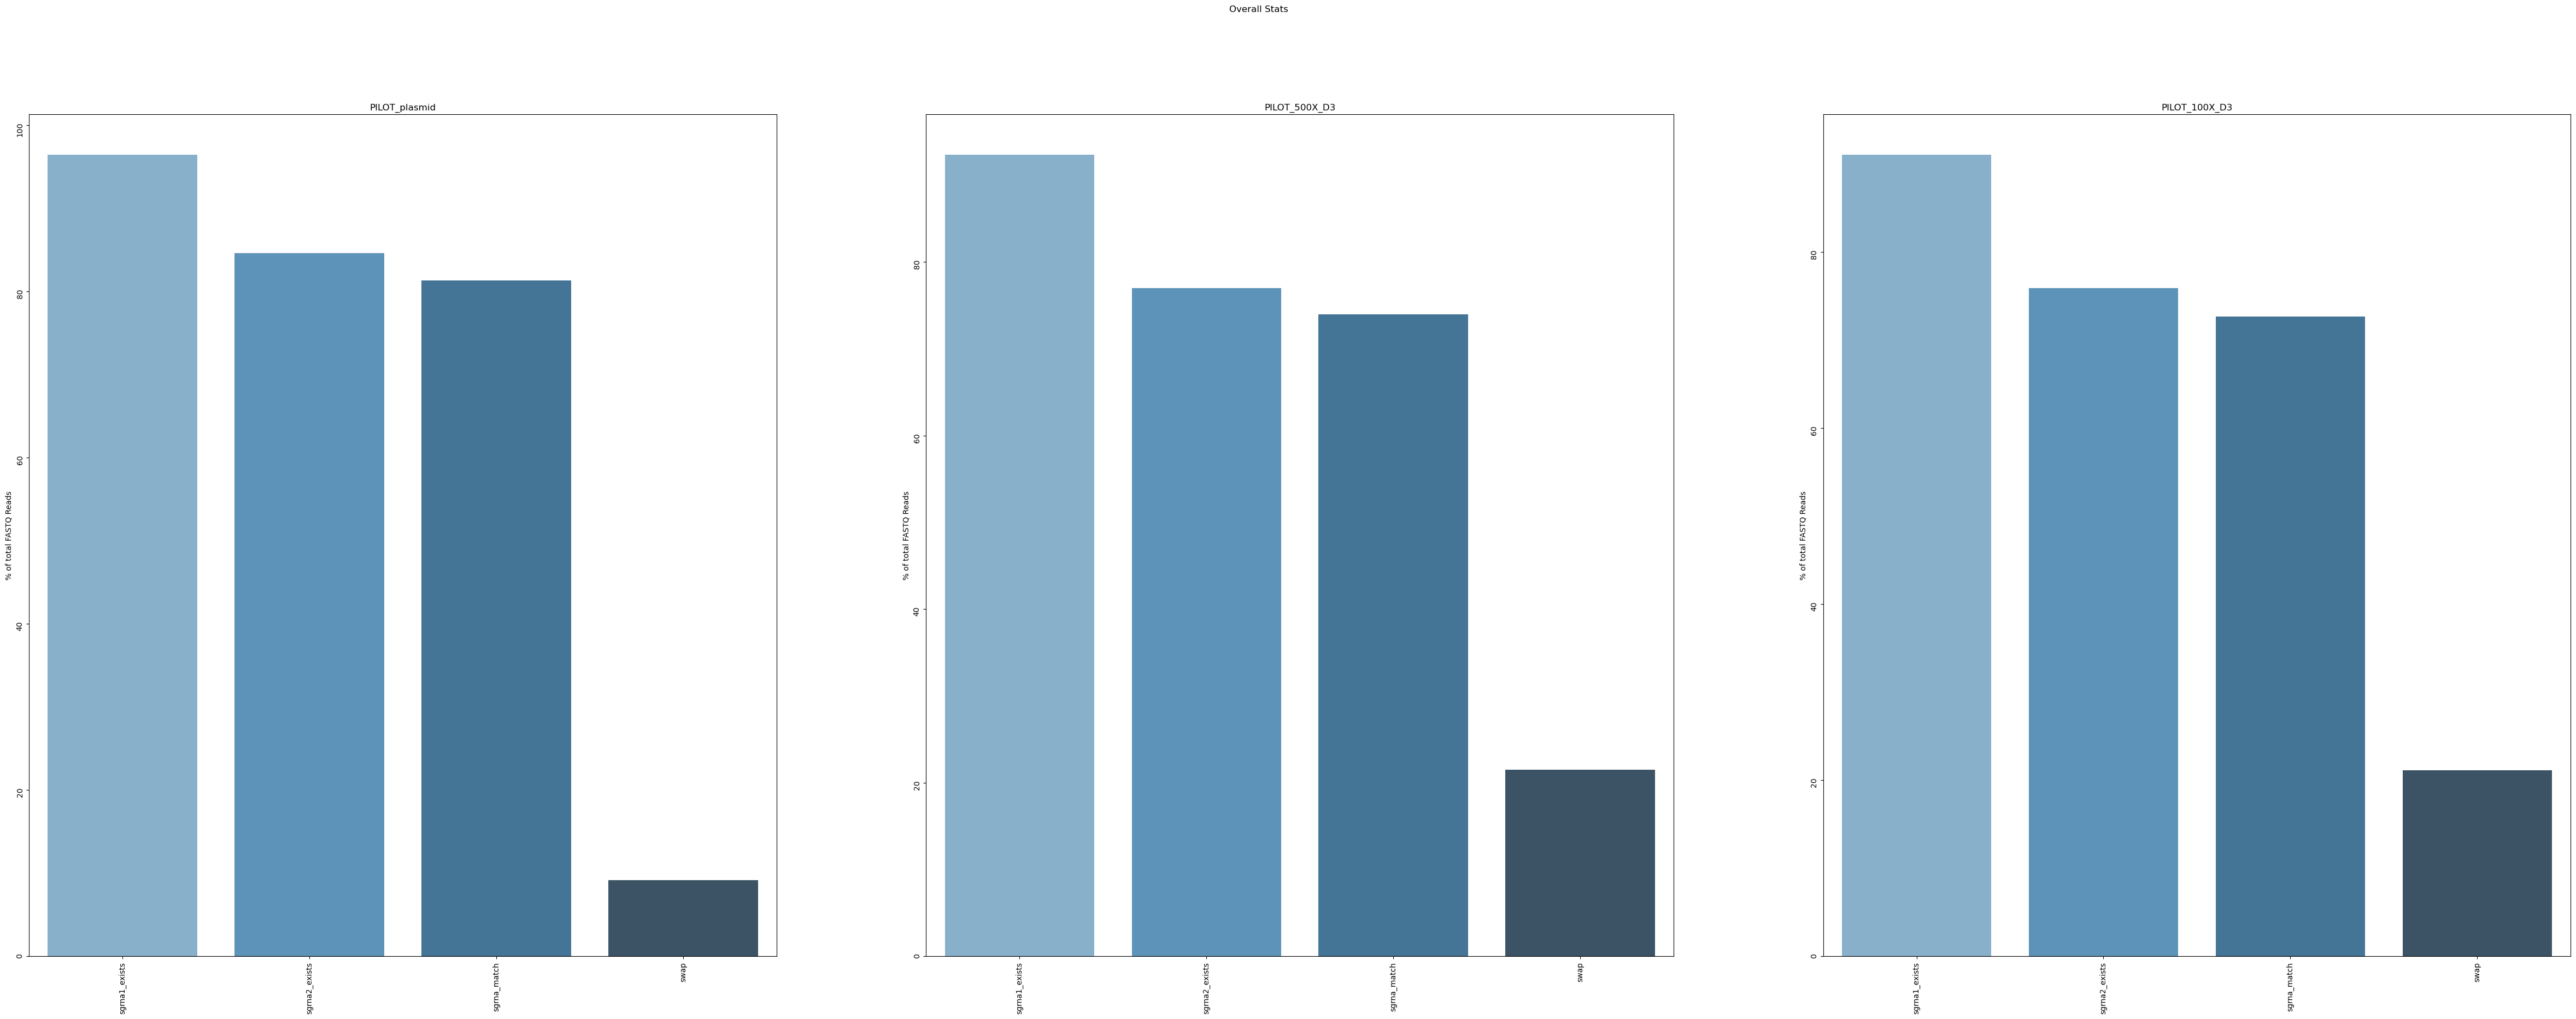

In [68]:
%matplotlib inline
fig, axs = plt.subplots(1, 3,figsize=(60,20))
fig.suptitle('Overall Stats')
pal1 = sns.color_palette("Blues_d",4)
pal2 = sns.color_palette("Oranges_d",4)
pal3 = sns.color_palette("Greens_d", 4)
pal4 = sns.color_palette("Blues_d", 4)
pal = pal1 + pal2 + pal3 + pal4

data1 = filtered_df99[filtered_df99['Sample']=="PILOT_Plasmid"]
sns.barplot(x=data1['type'], y=data1['value'], palette=pal, ax=axs[0])
axs[0].set_title("PILOT_plasmid")
axs[0].tick_params(labelrotation=90, which='both')
axs[0].set_xlabel(None)
axs[0].set_ylabel("% of total FASTQ Reads")

data1 = filtered_df99[filtered_df99['Sample']=="PILOT_500X_D3"]
sns.barplot(x=data1['type'], y=data1['value'], palette=pal, ax=axs[1])
axs[1].set_title("PILOT_500X_D3")
axs[1].tick_params(labelrotation=90, which='both')
axs[1].set_xlabel(None)
axs[1].set_ylabel("% of total FASTQ Reads")

data1 = filtered_df99[filtered_df99['Sample']=="PILOT_100X_D3"]
sns.barplot(x=data1['type'], y=data1['value'], palette=pal, ax=axs[2])
axs[2].set_title("PILOT_100X_D3")
axs[2].tick_params(labelrotation=90, which='both')
axs[2].set_xlabel(None)
axs[2].set_ylabel("% of total FASTQ Reads")

fig.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/overall_exact_min.jpg",dpi=300, bbox_inches="tight")


In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, 12,figsize=(60,10))
fig.suptitle('Overall Stats')
pal1 = sns.color_palette("Greys_d",1)
pal2 = sns.color_palette("Oranges_d",4)
pal3 = sns.color_palette("Greens_d", 4)
pal4 = sns.color_palette("Blues_d", 4)
pal = pal1 + pal2 + pal3 + pal4

data1 = df[df['type']=="sgrna1_exists_mismatch1"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal, ax=axs[0])
axs[0].set_title("sgrna1_exists")
axs[0].tick_params(labelrotation=90)
axs[0].set_xlabel(None)
axs[0].set_ylabel("% of total FASTQ Reads")

data1 = df[df['type']=="sgrna2_exists_mismatch1"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[1])
axs[1].set_title("sgrna2_exists")
axs[1].tick_params(labelrotation=90)
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

data1 = df[df['type']=="sgrna_match_mismatch1"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[2])
axs[2].set_title("Match")
axs[2].tick_params(labelrotation=90)
axs[2].set_xlabel(None)
axs[2].set_ylabel(None)

data1 = df[df['type']=="sgrna_inconsistent"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[3])
axs[3].set_title("sgrna_inconsistent")
axs[3].tick_params(labelrotation=90)
axs[3].set_xlabel(None)
axs[3].set_ylabel(None)

data1 = df[df['type']=="swap_mismatch1"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[4])
axs[4].set_title("Swap")
axs[4].tick_params(labelrotation=90)
axs[4].set_xlabel(None)
axs[4].set_ylabel(None)

data1 = df[df['type']=="scaffold_exist_mismatch1"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[5])
axs[5].set_title("Scaffold_exist")
axs[5].tick_params(labelrotation=90)
axs[5].set_xlabel(None)
axs[5].set_ylabel(None)

data1 = df[df['type']=="scaffold_WT_mismatch3"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[6])
axs[6].set_title("Scaffold_WT")
axs[6].tick_params(labelrotation=90)
axs[6].set_xlabel(None)
axs[6].set_ylabel(None)

data1 = df[df['type']=="scaffold_MT6_mismatch3"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[7])
axs[7].set_title("Scaffold_MT6")
axs[7].tick_params(labelrotation=90)
axs[7].set_xlabel(None)
axs[7].set_ylabel(None)

data1 = df[df['type']=="scaffold_MT7_mismatch3"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[8])
axs[8].set_title("Scaffold_MT7")
axs[8].tick_params(labelrotation=90)
axs[8].set_xlabel(None)
axs[8].set_ylabel(None)

data1 = df[df['type']=="swap_WT_mismatch"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[9])
axs[9].set_title("Swap_WT")
axs[9].tick_params(labelrotation=90)
axs[9].set_xlabel(None)
axs[9].set_ylabel(None)

data1 = df[df['type']=="swap_MT6_mismatch"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[10])
axs[10].set_title("Swap_MT6")
axs[10].tick_params(labelrotation=90)
axs[10].set_xlabel(None)
axs[10].set_ylabel(None)

data1 = df[df['type']=="swap_MT7_mismatch"]
sns.barplot(x=data1['Sample'], y=data1['value'], palette=pal,ax=axs[11])
axs[11].set_title("Swap_MT7")
axs[11].tick_params(labelrotation=90)
axs[11].set_xlabel(None)
axs[11].set_ylabel(None)

fig.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/overall_mismatch.jpg",dpi=300, bbox_inches="tight")

In [13]:
# Normalization function
def norm_rpm(countdata, scale=1e6):
    factors = countdata.sum() / scale
    return countdata.divide(factors)

In [14]:
exact_counts = pd.read_csv("/Users/ab42/Desktop/PILOT/MERGED/PILOT_EXACT_COUNTS.txt",sep="\t")
mismatch_counts = pd.read_csv("/Users/ab42/Desktop/PILOT/MERGED/PILOT_MISMATCH_COUNTS.txt",sep="\t")

In [ ]:
a=exact_counts.columns.to_list()
fields = ['ID','Notes','Scaffold','sgRNA1_ID','sgRNA2_ID','Gene1','Gene2','Gene_Pair']
samples=list(set(a)-set(fields))

exact_fielddata = exact_counts[fields]
exact_countdata = exact_counts[samples]
exact_result = norm_rpm(exact_countdata)
exact_result.columns = exact_result.columns + "_norm"
exact_count_normalized = pd.concat([exact_fielddata,exact_countdata,exact_result],axis=1,sort=False)

mismatch_fielddata = mismatch_counts[fields]
mismatch_countdata = mismatch_counts[samples]
mismatch_result = norm_rpm(mismatch_countdata)
mismatch_result.columns = mismatch_result.columns + "_norm"
mismatch_count_normalized = pd.concat([mismatch_fielddata,mismatch_countdata,mismatch_result],axis=1,sort=False)

timezeros = ['PILOT_PCR500X_D3','PILOT_500X_D3','PILOT_100X_D3']
mysamples=list(set(a)-set(fields)-set(timezeros))
samples_norm = [sub +"_norm" for sub in mysamples]
samples_plasmid = list(set(samples_norm)-{'PILOT_Plasmid_norm'})

exact_count_logfc_plasmid = exact_count_normalized.copy()

counter = len(exact_count_normalized.columns)
for mysample in samples_plasmid:
    data1 = exact_count_normalized[mysample].add(1)
    match_control = "PILOT_Plasmid_norm"
    data2 = exact_count_normalized[match_control].add(1)
    fc = data1.divide(data2,axis=0).apply(np.log2)
    exact_count_logfc_plasmid = pd.concat([exact_count_logfc_plasmid,fc],axis=1, sort=False)
    mycolname = mysample.replace('_norm','') + "_logFC"
    exact_count_logfc_plasmid.columns.values[counter] = mycolname
    counter = len(exact_count_logfc_plasmid.columns)

exact_count_logfc_d3 = exact_count_normalized.copy()

counter = len(exact_count_normalized.columns)
for mysample in samples_plasmid:
    data1 = exact_count_normalized[mysample].add(1)
    if "PILOT_100X" in mysample:
        match_control = "PILOT_100X_D3_norm"
    elif "PILOT_500X" in mysample:
        match_control = "PILOT_500X_D3_norm"
    elif "PILOT_PCR500X" in mysample:
        match_control = "PILOT_PCR500X_D3_norm"
    else:
        match_control = "PILOT_Plasmid_norm"
    data2 = exact_count_normalized[match_control].add(1)
    fc = data1.divide(data2,axis=0).apply(np.log2)
    exact_count_logfc_d3 = pd.concat([exact_count_logfc_d3,fc],axis=1, sort=False)
    mycolname = mysample.replace('_norm','') + "_logFC"
    exact_count_logfc_d3.columns.values[counter] = mycolname
    counter = len(exact_count_logfc_d3.columns)
    
mismatch_count_logfc_plasmid = mismatch_count_normalized.copy()

counter = len(mismatch_count_normalized.columns)
for mysample in samples_plasmid:
    data1 = mismatch_count_normalized[mysample].add(1)
    match_control = "PILOT_Plasmid_norm"
    data2 = mismatch_count_normalized[match_control].add(1)
    fc = data1.divide(data2,axis=0).apply(np.log2)
    mismatch_count_logfc_plasmid = pd.concat([mismatch_count_logfc_plasmid,fc],axis=1, sort=False)
    mycolname = mysample.replace('_norm','') + "_logFC"
    mismatch_count_logfc_plasmid.columns.values[counter] = mycolname
    counter = len(mismatch_count_logfc_plasmid.columns)

mismatch_count_logfc_d3 = mismatch_count_normalized.copy()

counter = len(mismatch_count_normalized.columns)
for mysample in samples_plasmid:
    data1 = mismatch_count_normalized[mysample].add(1)
    if "PILOT_100X" in mysample:
        match_control = "PILOT_100X_D3_norm"
    elif "PILOT_500X" in mysample:
        match_control = "PILOT_500X_D3_norm"
    elif "PILOT_PCR500X" in mysample:
        match_control = "PILOT_PCR500X_D3_norm"
    else:
        match_control = "PILOT_Plasmid_norm"
    data2 = mismatch_count_normalized[match_control].add(1)
    fc = data1.divide(data2,axis=0).apply(np.log2)
    mismatch_count_logfc_d3 = pd.concat([mismatch_count_logfc_d3,fc],axis=1, sort=False)
    mycolname = mysample.replace('_norm','') + "_logFC"
    mismatch_count_logfc_d3.columns.values[counter] = mycolname
    counter = len(mismatch_count_logfc_d3.columns)


In [ ]:
a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['ID']
c = b+a
mydata = exact_count_logfc_plasmid[c]

In [ ]:
def corr(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
   
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

In [ ]:
%matplotlib inline

plt.figure(figsize=(50,50))
grid = sns.PairGrid(data= mydata,
                    vars = a)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'blue');

plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_logfc_cor_plasmid.jpg",dpi=300)

In [ ]:
a = [s for s in exact_count_logfc_d3.columns if "_logFC" in s] 
b = ['ID']
c = b+a
mydata = exact_count_logfc_d3[c]

In [ ]:
%matplotlib inline

plt.figure(figsize=(50,50))
grid = sns.PairGrid(data= mydata,
                    vars = a)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'blue');

plt.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_logfc_cor_day3.jpg",dpi=300)

In [ ]:
a = [s for s in mismatch_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['ID']
c = b+a
mydata = mismatch_count_logfc_plasmid[c]

In [ ]:
%matplotlib inline

plt.figure(figsize=(50,50))
grid = sns.PairGrid(data= mydata,
                    vars = a)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'blue');
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Mismatch_logfc_cor_plasmid.jpg",dpi=300)

In [ ]:
a = [s for s in mismatch_count_logfc_d3.columns if "_logFC" in s] 
b = ['ID']
c = b+a
mydata = mismatch_count_logfc_d3[c]

In [ ]:
%matplotlib inline

plt.figure(figsize=(50,50))
grid = sns.PairGrid(data= mydata,
                    vars = a)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'blue');
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Mismatch_logfc_cor_day3.jpg",dpi=300)

In [ ]:
a = [s for s in exact_count_logfc_d3.columns if "_logFC" in s] 
b = ['Notes']
c = b+a
mydata = exact_count_logfc_d3[c]
mydata2 = mydata.melt(id_vars=["Notes"])

In [ ]:
mydata3 = mydata2
print(mydata3)
mydata3 = mydata3.drop(mydata3[mydata3 ['variable'] == 'PILOT_100X_D14_R1_logFC'].index)
mydata3 = mydata3.drop(mydata3[mydata3 ['variable'] == 'PILOT_100X_D14_R2_logFC'].index)
mydata3 = mydata3.drop(mydata3[mydata3 ['variable'] == 'PILOT_100X_D14_R3_logFC'].index)
mydata3 = mydata3.drop(mydata3[mydata3 ['variable'] == 'PILOT_PCR500X_D14_R1_logFC'].index)
mydata3 = mydata3.drop(mydata3[mydata3 ['variable'] == 'PILOT_PCR500X_D14_R2_logFC'].index)
mydata3 = mydata3.drop(mydata3[mydata3 ['variable'] == 'PILOT_PCR500X_D14_R3_logFC'].index)
mydata3 = mydata3.replace('GIpairs', 'Library')
mydata3 = mydata3.replace('Anchors', 'Library')
mydata3 = mydata3.replace('CopyNumber', 'Library')
mydata3 = mydata3.replace('DistanceCut', 'Library')
mydata3 = mydata3.replace('ScaffoldPosition', 'PosControls')
print(mydata3)

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.boxplot(x="value", y="variable", hue="Notes", data=mydata3,orient="h", palette="Blues");
plt.xlabel("Vector log2 fold-change")
plt.ylabel(None)
plt.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/dynamic_range_exact_day3_min.jpg",dpi=300,bbox_inches="tight")

In [ ]:
a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['Notes']
c = b+a
mydata = exact_count_logfc_plasmid[c]
mydata2 = mydata.melt(id_vars=["Notes"])

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.boxplot(x="value", y="variable", hue="Notes", data=mydata2,orient="h");
plt.xlabel("Vector log2 fold-change")
plt.ylabel(None)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/dynamic_range_exact_plasmid.jpg",dpi=300,bbox_inches="tight")

In [ ]:
a = [s for s in mismatch_count_logfc_d3.columns if "_logFC" in s] 
b = ['Notes']
c = b+a
mydata = mismatch_count_logfc_d3[c]
mydata2 = mydata.melt(id_vars=["Notes"])

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.boxplot(x="value", y="variable", hue="Notes", data=mydata2,orient="h");
plt.xlabel("Vector log2 fold-change")
plt.ylabel(None)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/dynamic_range_mismatch_day3.jpg",dpi=300,bbox_inches="tight")

In [ ]:
a = [s for s in mismatch_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['Notes']
c = b+a
mydata = mismatch_count_logfc_plasmid[c]
mydata2 = mydata.melt(id_vars=["Notes"])

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.boxplot(x="value", y="variable", hue="Notes", data=mydata2,orient="h");
plt.xlabel("Vector log2 fold-change")
plt.ylabel(None)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/dynamic_range_mismatch_plasmid.jpg",dpi=300,bbox_inches="tight")

In [ ]:
a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['Notes','Scaffold']
c = b+a
mydata = exact_count_logfc_plasmid[c]
mydata2 = mydata.melt(id_vars=['Notes','Scaffold'])

In [ ]:
%matplotlib inline
mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_100X")]
plt.figure(figsize=(15,15))
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h");

In [ ]:
%matplotlib inline
mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_500X")]
mydata3 = mydata3.replace('GIpairs', 'Library')
mydata3 = mydata3.replace('Anchors', 'Library')
mydata3 = mydata3.replace('CopyNumber', 'Library')
mydata3 = mydata3.replace('DistanceCut', 'Library')
mydata3 = mydata3.replace('ScaffoldPosition', 'PosControls')
plt.figure(figsize=(15,15))
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h", palette="Blues");

In [ ]:
%matplotlib inline
mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_PCR500X")]
plt.figure(figsize=(15,15))
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h");

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, 3,figsize=(60,20))

a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['Notes','Scaffold']
c = b+a
mydata = exact_count_logfc_plasmid[c]
mydata2 = mydata.melt(id_vars=['Notes','Scaffold'])
mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_100X")]
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h",ax=axs[0]);
axs[0].legend([],[], frameon=False)

mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_500X")]
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h",ax=axs[1]);
axs[1].legend([],[], frameon=False)

mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_PCR500X")]
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h",ax=axs[2]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=30)

plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/scaffold_exact_plasmid.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, 3,figsize=(60,20))

a = [s for s in mismatch_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['Notes','Scaffold']
c = b+a
mydata = mismatch_count_logfc_plasmid[c]
mydata2 = mydata.melt(id_vars=['Notes','Scaffold'])
mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_100X")]
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h",ax=axs[0]);
axs[0].legend([],[], frameon=False)

mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_500X")]
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h",ax=axs[1]);
axs[1].legend([],[], frameon=False)

mydata3 = mydata2[mydata2['variable'].str.contains("PILOT_PCR500X")]
sns.boxplot(x="value", y="Scaffold", hue="Notes", data=mydata3,orient="h",ax=axs[2]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=30)

plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/scaffold_mismatch_plasmid.jpg",dpi=300,bbox_inches="tight")

In [ ]:
a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = list(exact_count_logfc_plasmid.columns[:8])
c = b+a
mydata = exact_count_logfc_plasmid[c]
wt = mydata[mydata['Scaffold']=="Wildtype"]
M6 = mydata[mydata['Scaffold']=="Modified6"]
M7 = mydata[mydata['Scaffold']=="Modified7"]
a = list(wt.columns[8:])
b = ['sgRNA1_ID','sgRNA2_ID']
c = b+a
d = b + list([s+"_WT" for s in a])
e = b + list([s+"_M6" for s in a])
f = b + list([s+"_M7" for s in a])
wt_data = wt[c]
M6_data = M6[c]
M7_data = M7[c]
wt_data.columns = d
M6_data.columns = e
M7_data.columns = f
data1 = pd.merge(wt_data, M6_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2 = pd.merge(data1, M7_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2.to_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_all_exact_plasmid_data.txt",sep="\t",index=False)

In [ ]:
a = [s for s in exact_count_logfc_d3.columns if "_logFC" in s] 
b = list(exact_count_logfc_d3.columns[:8])
c = b+a
mydata = exact_count_logfc_d3[c]
wt = mydata[mydata['Scaffold']=="Wildtype"]
M6 = mydata[mydata['Scaffold']=="Modified6"]
M7 = mydata[mydata['Scaffold']=="Modified7"]
a = list(wt.columns[8:])
b = ['sgRNA1_ID','sgRNA2_ID']
c = b+a
d = b + list([s+"_WT" for s in a])
e = b + list([s+"_M6" for s in a])
f = b + list([s+"_M7" for s in a])
wt_data = wt[c]
M6_data = M6[c]
M7_data = M7[c]
wt_data.columns = d
M6_data.columns = e
M7_data.columns = f
data1 = pd.merge(wt_data, M6_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2 = pd.merge(data1, M7_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2.to_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_all_exact_d3_data.txt",sep="\t",index=False)

In [ ]:
a = [s for s in mismatch_count_logfc_plasmid.columns if "_logFC" in s] 
b = list(mismatch_count_logfc_plasmid.columns[:8])
c = b+a
mydata = mismatch_count_logfc_plasmid[c]
wt = mydata[mydata['Scaffold']=="Wildtype"]
M6 = mydata[mydata['Scaffold']=="Modified6"]
M7 = mydata[mydata['Scaffold']=="Modified7"]
a = list(wt.columns[8:])
b = ['sgRNA1_ID','sgRNA2_ID']
c = b+a
d = b + list([s+"_WT" for s in a])
e = b + list([s+"_M6" for s in a])
f = b + list([s+"_M7" for s in a])
wt_data = wt[c]
M6_data = M6[c]
M7_data = M7[c]
wt_data.columns = d
M6_data.columns = e
M7_data.columns = f
data1 = pd.merge(wt_data, M6_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2 = pd.merge(data1, M7_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2.to_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_all_mismatch_plasmid_data.txt",sep="\t",index=False)

In [ ]:
a = [s for s in mismatch_count_logfc_d3.columns if "_logFC" in s] 
b = list(mismatch_count_logfc_d3.columns[:8])
c = b+a
mydata = mismatch_count_logfc_d3[c]
wt = mydata[mydata['Scaffold']=="Wildtype"]
M6 = mydata[mydata['Scaffold']=="Modified6"]
M7 = mydata[mydata['Scaffold']=="Modified7"]
a = list(wt.columns[8:])
b = ['sgRNA1_ID','sgRNA2_ID']
c = b+a
d = b + list([s+"_WT" for s in a])
e = b + list([s+"_M6" for s in a])
f = b + list([s+"_M7" for s in a])
wt_data = wt[c]
M6_data = M6[c]
M7_data = M7[c]
wt_data.columns = d
M6_data.columns = e
M7_data.columns = f
data1 = pd.merge(wt_data, M6_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2 = pd.merge(data1, M7_data, on=['sgRNA1_ID','sgRNA2_ID'])
data2.to_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_all_mismatch_d3_data.txt",sep="\t",index=False)

In [ ]:
scaffold_exact_plasmid_counts = pd.read_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_exact_plasmid_data.txt",sep="\t")
scaffold_exact_d3_counts = pd.read_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_exact_d3_data.txt",sep="\t")
scaffold_mismatch_plasmid_counts = pd.read_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_mismatch_plasmid_data.txt",sep="\t")
scaffold_mismatch_d3_counts = pd.read_csv("/Users/ab42/Desktop/PILOT/SCAFFOLD/scaffold_mismatch_d3_data.txt",sep="\t")

In [ ]:
%matplotlib inline

plt.figure(figsize=(50,50))
mydata1 = scaffold_exact_plasmid_counts.copy()
a = ['Guide_pair']
b = list(mydata1.columns[2:])
c = a+b
mydata1['Guide_pair'] = mydata1['sgRNA1_ID'].astype(str) + "~" + mydata1['sgRNA2_ID'].astype(str)
mydata2 = mydata1[c]

grid = sns.PairGrid(data= mydata2,
                    vars = b)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'blue');
plt.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_scaffolds_logfc_cor_plasmid.jpg",dpi=300)

In [ ]:
%matplotlib inline

plt.figure(figsize=(50,50))
mydata1 = scaffold_mismatch_plasmid_counts.copy()
a = ['Guide_pair']
b = list(mydata1.columns[2:])
c = a+b
mydata1['Guide_pair'] = mydata1['sgRNA1_ID'].astype(str) + "~" + mydata1['sgRNA2_ID'].astype(str)
mydata2 = mydata1[c]

grid = sns.PairGrid(data= mydata2,
                    vars = b)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'blue');
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Mismatch_scaffolds_logfc_cor_plasmid.jpg",dpi=300)

# Positional Effects

In [ ]:
a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['Gene1','Gene2','Scaffold']
d = ['PILOT_100X_D14','PILOT_500X_D14','PILOT_PCR500X_D14']
c = b+a
e = b+d
mydata = exact_count_logfc_plasmid[c]
mydata['PILOT_100X_D14'] = mydata[['PILOT_100X_D14_R1_logFC', 'PILOT_100X_D14_R2_logFC', 'PILOT_100X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_500X_D14'] = mydata[['PILOT_500X_D14_R1_logFC', 'PILOT_500X_D14_R2_logFC', 'PILOT_500X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_PCR500X_D14'] = mydata[['PILOT_PCR500X_D14_R1_logFC', 'PILOT_PCR500X_D14_R2_logFC', 'PILOT_PCR500X_D14_R3_logFC']].mean(axis=1)
mydata2 = mydata[e]
mydata_wt = mydata2[mydata2['Scaffold']=="Wildtype"].groupby(['Gene1','Gene2','Scaffold']).mean().reset_index()
mydata_modified6 = mydata2[mydata2['Scaffold']=="Modified6"].groupby(['Gene1','Gene2','Scaffold']).mean().reset_index()
mydata_modified7 = mydata2[mydata2['Scaffold']=="Modified7"].groupby(['Gene1','Gene2','Scaffold']).mean().reset_index()

In [ ]:
gene1index = {}
for i in range(0,len(mydata_wt)):
    rna1 = mydata_wt.Gene1[i]
    rna2 = mydata_wt.Gene2[i]
    if rna1 in gene1index:
        gene1index[rna1].append(i)
    else:
        gene1index[rna1] = []
        gene1index[rna1].append(i)

In [ ]:
results = []
for i in range(0,len(mydata_wt)):
    rna1 = mydata_wt.Gene1[i]
    rna2 = mydata_wt.Gene2[i]
    if i%5000 == 1:
        print(i,flush=True)
    if rna2 in gene1index:
        for j in gene1index[rna2]:
            myid = int(j)
            t1 = mydata_wt.Gene1[myid]
            t2 = mydata_wt.Gene2[myid]
            if t2 == rna1:
                results.append((i,myid))

In [ ]:
gene1index6 = {}
for i in range(0,len(mydata_modified6)):
    rna1 = mydata_modified6.Gene1[i]
    rna2 = mydata_modified6.Gene2[i]
    if rna1 in gene1index6:
        gene1index6[rna1].append(i)
    else:
        gene1index6[rna1] = []
        gene1index6[rna1].append(i)

In [ ]:
results6 = []
for i in range(0,len(mydata_modified6)):
    rna1 = mydata_modified6.Gene1[i]
    rna2 = mydata_modified6.Gene2[i]
    if i%5000 == 1:
        print(i,flush=True)
    if rna2 in gene1index6:
        for j in gene1index6[rna2]:
            myid = int(j)
            t1 = mydata_modified6.Gene1[myid]
            t2 = mydata_modified6.Gene2[myid]
            if t2 == rna1:
                results6.append((i,myid))

In [ ]:
gene1index7 = {}
for i in range(0,len(mydata_modified7)):
    rna1 = mydata_modified7.Gene1[i]
    rna2 = mydata_modified7.Gene2[i]
    if rna1 in gene1index7:
        gene1index7[rna1].append(i)
    else:
        gene1index7[rna1] = []
        gene1index7[rna1].append(i)

In [ ]:
results7 = []
for i in range(0,len(mydata_modified7)):
    rna1 = mydata_modified7.Gene1[i]
    rna2 = mydata_modified7.Gene2[i]
    if i%5000 == 1:
        print(i,flush=True)
    if rna2 in gene1index7:
        for j in gene1index7[rna2]:
            myid = int(j)
            t1 = mydata_modified7.Gene1[myid]
            t2 = mydata_modified7.Gene2[myid]
            if t2 == rna1:
                results7.append((i,myid))

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_500X_D14"
data = []
for i,j in results:
    data.append((mydata_wt[sample][i],mydata_wt[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "LFC correlation plot\n PILOT_500X - Wildtype\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/Exact_Pos11.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_100X_D14"
data = []
for i,j in results:
    data.append((mydata_wt[sample][i],mydata_wt[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "PILOT_100X - Wildtype\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Pos12.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_PCR500X_D14"
data = []
for i,j in results:
    data.append((mydata_wt[sample][i],mydata_wt[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "PILOT_PCR500X - Wildtype\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Pos13.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_500X_D14"
data = []
for i,j in results6:
    data.append((mydata_modified6[sample][i],mydata_modified6[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "LFC Correlation mod6\n PILOT_500X - Modified6\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/LFC_Correlation_mod6.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_100X_D14"
data = []
for i,j in results6:
    data.append((mydata_modified6[sample][i],mydata_modified6[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "PILOT_100X - Modified6\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Pos22.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_PCR500X_D14"
data = []
for i,j in results6:
    data.append((mydata_modified6[sample][i],mydata_modified6[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "PILOT_PCR500X - Modified6\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Pos23.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_500X_D14"
data = []
for i,j in results7:
    data.append((mydata_modified7[sample][i],mydata_modified7[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "LFC Correlation mod7\n PILOT_500X - Modified7\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/LFC_Correlation_mod7.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_100X_D14"
data = []
for i,j in results7:
    data.append((mydata_modified7[sample][i],mydata_modified7[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "PILOT_100X - Modified7\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Pos32.jpg",dpi=300,bbox_inches="tight")

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,10))
sample = "PILOT_PCR500X_D14"
data = []
for i,j in results7:
    data.append((mydata_modified7[sample][i],mydata_modified7[sample][j]))
corr, p = stats.pearsonr(*zip(*data))
test1 = pd.DataFrame (data, columns = ['sgRNA1','sgRNA2'])
sns.jointplot(data=test1, x="sgRNA1", y="sgRNA2", kind="reg")
mytitle = "PILOT_PCR500X - Modified7\n Pearsons R="+str(corr)
plt.suptitle(mytitle,y=1.1)
plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Pos33.jpg",dpi=300,bbox_inches="tight")

# Recall Curves

In [ ]:
from crispy.Utils import Utils
from crispy.QCPlot import QCplot
from crispy.CRISPRData import CRISPRDataSet, Library

In [ ]:
lib_annotation = pd.read_csv("/Users/ab42/Desktop/PILOT/LIB/PilotLib_Annot.txt",sep="\t")

In [ ]:
vector_status_pal = [
        ("essential + non-targeting", "#ff7f0e"),
        ("non-targeting + essential", "#ffbb78"),

        ("intergenic + essential", "#2ca02c"),
        ("essential + intergenic", "#98df8a"),

        ("non-essential + non-essential", "#3182bd"),
        ("non-targeting + non-targeting", "#393b79"),
        ("intergenic + intergenic", "#756bb1"),
    ]

In [ ]:
a = [s for s in exact_count_logfc_d3.columns if "_logFC" in s] 
b = ['ID','Notes','Gene1','Gene2','Scaffold','Gene_Pair']
d = ['PILOT_100X_D14','PILOT_500X_D14','PILOT_PCR500X_D14']
c = b+a
e = b+d
mydata = exact_count_logfc_d3[c]
mydata['PILOT_100X_D14'] = mydata[['PILOT_100X_D14_R1_logFC', 'PILOT_100X_D14_R2_logFC', 'PILOT_100X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_500X_D14'] = mydata[['PILOT_500X_D14_R1_logFC', 'PILOT_500X_D14_R2_logFC', 'PILOT_500X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_PCR500X_D14'] = mydata[['PILOT_PCR500X_D14_R1_logFC', 'PILOT_PCR500X_D14_R2_logFC', 'PILOT_PCR500X_D14_R3_logFC']].mean(axis=1)
mydata2 = mydata[e]
myannot = lib_annotation[['ID','sgRNA1_Class','sgRNA2_Class','vector_class']]
data1 = pd.merge(mydata2, myannot, on=['ID'])

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(60, 10))

c1 = "PILOT_100X_D14"
c2 = "PILOT_500X_D14"
c3 = "PILOT_PCR500X_D14"

for stype, stype_color in vector_status_pal:
    stype_df = data1[~data1["Notes"].isin(["DistanceCut"])]
    stype_index_set = set(stype_df.query(f"vector_class == '{stype}'").index)

    x, y, xy_auc = QCplot.recall_curve(stype_df[c1], stype_index_set)
    axs[0].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=3.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c2], stype_index_set)
    axs[1].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=3.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c3], stype_index_set)
    axs[2].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=3.0,
        c=stype_color,
        alpha=0.8,
    )
    
    
    

axs[0].plot((0, 1), (0, 1), "k--", lw=1.0, alpha=0.5)
axs[1].plot((0, 1), (0, 1), "k--", lw=1.0, alpha=0.5)
axs[2].plot((0, 1), (0, 1), "k--", lw=1.0, alpha=0.5)

axs[0].grid(True, ls="-", lw=1.0, alpha=0.1, zorder=0, axis="both")
axs[1].grid(True, ls="-", lw=1.0, alpha=0.1, zorder=0, axis="both")
axs[2].grid(True, ls="-", lw=1.0, alpha=0.1, zorder=0, axis="both")

axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[0].set_xlabel("Percent-rank of vectors", fontsize=20)
axs[0].set_ylabel("Cumulative fraction", fontsize=20)
axs[1].set_xlabel("Percent-rank of vectors", fontsize=20)
axs[1].set_ylabel("Cumulative fraction", fontsize=20)
axs[2].set_xlabel("Percent-rank of vectors", fontsize=20)
axs[2].set_ylabel("Cumulative fraction", fontsize=20)

axs[0].set_aspect(aspect=1)
axs[1].set_aspect(aspect=1)
axs[2].set_aspect(aspect=1)

axs[0].set_title(c1)
axs[1].set_title(c2)
axs[2].set_title(c3)

axs[0].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=20)
axs[1].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=20)
axs[2].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=20)

plt.savefig("/Users/ab42/Desktop/PILOT/PILOT_LIB_PLOTS_NEW/Exact_Recall_D3.jpg",dpi=300,bbox_inches="tight")

In [ ]:
a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['ID','Notes','Gene1','Gene2','Scaffold','Gene_Pair']
d = ['PILOT_100X_D14','PILOT_500X_D14','PILOT_PCR500X_D14']
c = b+a
e = b+d
mydata = exact_count_logfc_plasmid[c]
mydata['PILOT_100X_D14'] = mydata[['PILOT_100X_D14_R1_logFC', 'PILOT_100X_D14_R2_logFC', 'PILOT_100X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_500X_D14'] = mydata[['PILOT_500X_D14_R1_logFC', 'PILOT_500X_D14_R2_logFC', 'PILOT_500X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_PCR500X_D14'] = mydata[['PILOT_PCR500X_D14_R1_logFC', 'PILOT_PCR500X_D14_R2_logFC', 'PILOT_PCR500X_D14_R3_logFC']].mean(axis=1)
mydata2 = mydata[e]
myannot = lib_annotation[['ID','sgRNA1_Class','sgRNA2_Class','vector_class']]
data1 = pd.merge(mydata2, myannot, on=['ID'])

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(60, 10))

c1 = "PILOT_100X_D14"
c2 = "PILOT_500X_D14"
c3 = "PILOT_PCR500X_D14"

for stype, stype_color in vector_status_pal:
    stype_df = data1[~data1["Notes"].isin(["DistanceCut"])]
    stype_index_set = set(stype_df.query(f"vector_class == '{stype}'").index)

    x, y, xy_auc = QCplot.recall_curve(stype_df[c1], stype_index_set)
    axs[0].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c2], stype_index_set)
    axs[1].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c3], stype_index_set)
    axs[2].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    
    

axs[0].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[1].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[2].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)

axs[0].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[1].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[2].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")

axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[0].set_xlabel("Percent-rank of vectors")
axs[0].set_ylabel("Cumulative fraction")
axs[1].set_xlabel("Percent-rank of vectors")
axs[1].set_ylabel("Cumulative fraction")
axs[2].set_xlabel("Percent-rank of vectors")
axs[2].set_ylabel("Cumulative fraction")

axs[0].set_title(c1)
axs[1].set_title(c2)
axs[2].set_title(c3)

axs[0].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[2].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Recall_Plasmid.jpg",dpi=300,bbox_inches="tight")

In [ ]:
a = [s for s in exact_count_logfc_plasmid.columns if "_logFC" in s] 
b = ['ID','Notes','Gene1','Gene2','Scaffold','Gene_Pair']
d = ['PILOT_100X_D14','PILOT_500X_D14','PILOT_PCR500X_D14']
c = b+a
e = b+d
mydata = exact_count_logfc_plasmid[c]
mydata['PILOT_100X_D14'] = mydata[['PILOT_100X_D14_R1_logFC', 'PILOT_100X_D14_R2_logFC', 'PILOT_100X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_500X_D14'] = mydata[['PILOT_500X_D14_R1_logFC', 'PILOT_500X_D14_R2_logFC', 'PILOT_500X_D14_R3_logFC']].mean(axis=1)
mydata['PILOT_PCR500X_D14'] = mydata[['PILOT_PCR500X_D14_R1_logFC', 'PILOT_PCR500X_D14_R2_logFC', 'PILOT_PCR500X_D14_R3_logFC']].mean(axis=1)
mydata2 = mydata[e]
myannot = lib_annotation[['ID','sgRNA1_Class','sgRNA2_Class','vector_class']]
data1 = pd.merge(mydata2, myannot, on=['ID'])
data1_wt = data1[data1['Scaffold']=="Wildtype"]
data1_m6 = data1[data1['Scaffold']=="Modified6"]
data1_m7 = data1[data1['Scaffold']=="Modified7"]

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(60, 10))

c1 = "PILOT_100X_D14"
c2 = "PILOT_500X_D14"
c3 = "PILOT_PCR500X_D14"

for stype, stype_color in vector_status_pal:
    stype_df = data1_wt[~data1_wt["Notes"].isin(["DistanceCut"])]
    stype_index_set = set(stype_df.query(f"vector_class == '{stype}'").index)

    x, y, xy_auc = QCplot.recall_curve(stype_df[c1], stype_index_set)
    axs[0].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c2], stype_index_set)
    axs[1].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c3], stype_index_set)
    axs[2].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    
    

axs[0].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[1].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[2].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)

axs[0].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[1].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[2].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")

axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[0].set_xlabel("Percent-rank of vectors")
axs[0].set_ylabel("Cumulative fraction")
axs[1].set_xlabel("Percent-rank of vectors")
axs[1].set_ylabel("Cumulative fraction")
axs[2].set_xlabel("Percent-rank of vectors")
axs[2].set_ylabel("Cumulative fraction")

axs[0].set_title(c1)
axs[1].set_title(c2)
axs[2].set_title(c3)

axs[0].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[2].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Recall_plot11.jpg",dpi=300,bbox_inches="tight")


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(60, 10))

c1 = "PILOT_100X_D14"
c2 = "PILOT_500X_D14"
c3 = "PILOT_PCR500X_D14"

for stype, stype_color in vector_status_pal:
    stype_df = data1_m6[~data1_m6["Notes"].isin(["DistanceCut"])]
    stype_index_set = set(stype_df.query(f"vector_class == '{stype}'").index)

    x, y, xy_auc = QCplot.recall_curve(stype_df[c1], stype_index_set)
    axs[0].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c2], stype_index_set)
    axs[1].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c3], stype_index_set)
    axs[2].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    
    

axs[0].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[1].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[2].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)

axs[0].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[1].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[2].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")

axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[0].set_xlabel("Percent-rank of vectors")
axs[0].set_ylabel("Cumulative fraction")
axs[1].set_xlabel("Percent-rank of vectors")
axs[1].set_ylabel("Cumulative fraction")
axs[2].set_xlabel("Percent-rank of vectors")
axs[2].set_ylabel("Cumulative fraction")

axs[0].set_title(c1)
axs[1].set_title(c2)
axs[2].set_title(c3)

axs[0].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[2].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Recall_plot12.jpg",dpi=300,bbox_inches="tight")


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(60, 10))

c1 = "PILOT_100X_D14"
c2 = "PILOT_500X_D14"
c3 = "PILOT_PCR500X_D14"

for stype, stype_color in vector_status_pal:
    stype_df = data1_m7[~data1_m7["Notes"].isin(["DistanceCut"])]
    stype_index_set = set(stype_df.query(f"vector_class == '{stype}'").index)

    x, y, xy_auc = QCplot.recall_curve(stype_df[c1], stype_index_set)
    axs[0].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c2], stype_index_set)
    axs[1].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    x, y, xy_auc = QCplot.recall_curve(stype_df[c3], stype_index_set)
    axs[2].plot(
        x,
        y,
        label=f"{stype} = {xy_auc:.2f} (N={len(stype_index_set)})",
        lw=1.0,
        c=stype_color,
        alpha=0.8,
    )
    
    
    

axs[0].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[1].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)
axs[2].plot((0, 1), (0, 1), "k--", lw=0.3, alpha=0.5)

axs[0].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[1].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")
axs[2].grid(True, ls="-", lw=0.1, alpha=1.0, zorder=0, axis="both")

axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[0].set_xlabel("Percent-rank of vectors")
axs[0].set_ylabel("Cumulative fraction")
axs[1].set_xlabel("Percent-rank of vectors")
axs[1].set_ylabel("Cumulative fraction")
axs[2].set_xlabel("Percent-rank of vectors")
axs[2].set_ylabel("Cumulative fraction")

axs[0].set_title(c1)
axs[1].set_title(c2)
axs[2].set_title(c3)

axs[0].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[1].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
axs[2].legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("/Users/ek11/Desktop/PILOT/PILOT_LIB_PLOTS/Exact_Recall_plot13.jpg",dpi=300,bbox_inches="tight")